<a href="https://colab.research.google.com/github/farisazizy/my-coursera-project/blob/main/tensortRT/tensor_optimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# check TensorRT version
import tensorflow as tf
print("TensorFlow version: ", tf.version.VERSION)
print("TensorRT version: ")
!dpkg -l | grep nvinfer

TensorFlow version:  2.12.0
TensorRT version: 


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.compiler.tensorrt import trt_convert as trt
from tensorflow.python.saved_model import tag_constants
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

# Load Data

In [ ]:
!mkdir ./data
!wget  -qO ./data/img0.JPG "https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/Golden_Retriever_Carlos_%2810581910556%29.jpg/640px-Golden_Retriever_Carlos_%2810581910556%29.jpg"
!wget  -qO ./data/img1.JPG "https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Red-shouldered_Hawk_%28Buteo_lineatus%29_-_Blue_Cypress_Lake%2C_Florida.jpg/407px-Red-shouldered_Hawk_%28Buteo_lineatus%29_-_Blue_Cypress_Lake%2C_Florida.jpg"
!wget  -qO ./data/img2.JPG "https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/Ostrich_male_RWD.jpg/636px-Ostrich_male_RWD.jpg"
!wget  -qO ./data/img3.JPG "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Working_pay_phone%2C_Jensen_Beach%2C_Florida%2C_September_4%2C_2012_001.JPG/360px-Working_pay_phone%2C_Jensen_Beach%2C_Florida%2C_September_4%2C_2012_001.JPG"

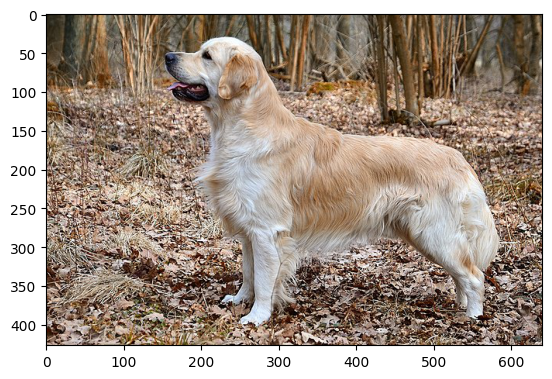

In [ ]:
img = mpimg.imread('data/img0.JPG')
imgplot = plt.imshow(img)
plt.show()

# Model

In [ ]:
def show_predictions(model):
  for i in range(4):
    img_path = './data/img%d.JPG'%i
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    print('{} - Predicted: {}'.format(img_path, decode_predictions(preds, top=3)[0]))

    plt.subplot(2,2,i+1)
    plt.imshow(img);
    plt.axis('off');
    plt.title(decode_predictions(preds, top=3)[0][0][1])

  show_predictions(model)

35363/35363 [==============================] - 0s 0us/step
./data/img0.JPG - Predicted: [('n02099601', 'golden_retriever', 0.7291168), ('n02099712', 'Labrador_retriever', 0.12025541), ('n02104029', 'kuvasz', 0.020343278)]
1/1 [==============================] - 0s 247ms/step
./data/img1.JPG - Predicted: [('n01608432', 'kite', 0.98407644), ('n01807496', 'partridge', 0.0009486731), ('n01806567', 'quail', 0.00046502234)]
1/1 [==============================] - 0s 238ms/step
./data/img2.JPG - Predicted: [('n01518878', 'ostrich', 0.9310745), ('n02018795', 'bustard', 0.0021014316), ('n02437616', 'llama', 0.00084433024)]
1/1 [==============================] - 0s 246ms/step
./data/img3.JPG - Predicted: [('n03902125', 'pay-phone', 0.9874971), ('n03187595', 'dial_telephone', 0.009310036), ('n02977058', 'cash_machine', 4.1334904e-05)]


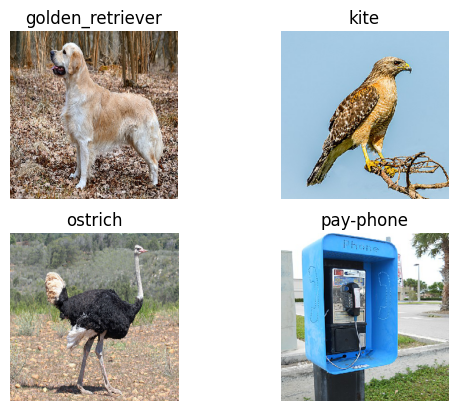

In [ ]:
def show_predictions(model):
    for i in range(4):
        img_path = './data/img%d.JPG' % i
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        preds = model.predict(x)
        print('{} - Predicted: {}'.format(img_path, decode_predictions(preds, top=3)[0]))

        plt.subplot(2, 2, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(decode_predictions(preds, top=3)[0][0][1])

    # Save the model as a TensorFlow SavedModel
    tf.saved_model.save(model, './saved_model')

# Create the model
model = InceptionV3(weights='imagenet')

# Call the function to show predictions and save the model
show_predictions(model)


# Batch Input

In [ ]:
def create_batch_input(img_paths):
    batch_images = []
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        batch_images.append(x)

    batch_images = np.concatenate(batch_images, axis=0)
    return batch_images

def show_predictions(model, batch_images):
    preds = model.predict(batch_images)
    for i, img_path in enumerate(img_paths):
        print('{} - Predicted: {}'.format(img_path, decode_predictions(preds[i:i+1], top=3)[0]))

        plt.subplot(2, 2, i + 1)
        plt.imshow(image.load_img(img_path))
        plt.axis('off')
        plt.title(decode_predictions(preds[i:i+1], top=3)[0][0][1])

    # Save the model as a TensorFlow SavedModel
    tf.saved_model.save(model, './saved_model')

# Create the model
model = InceptionV3(weights='imagenet')

# Image paths for the batch input
img_paths = ['./data/img0.JPG', './data/img1.JPG', './data/img2.JPG', './data/img3.JPG']

# Create the batch input
batch_images = create_batch_input(img_paths)

# Call the function to show predictions and save the model
show_predictions(model, batch_images)
